In [1]:
# This script performs the BCR reperotire-related analysis

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from math import floor

rcParams["font.size"] = 14
rcParams["font.family"] = 'arial'

In [3]:
# Import the metadata of `bc.proj.clean` and filter it for cells from our in-house enriched samples

In [4]:
df_meta = pd.read_csv("/path/to/bc.proj.clean.metadata.csv", index_col=0)
df_meta = df_meta[df_meta["Project"]=="Enriched B"]
df_meta

/tmp/ipykernel_33665/1414840774.py:1: DtypeWarning: Columns (7,9,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv("../Tables/bc.proj.clean.metadata.20230921.csv", index_col=0)


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,sample,donor,batch,seurat_clusters,cell_type,integrated_snn_res.0.8,...,subclass,isotype,integrated_snn_res.1,cell_group,RNA_snn_res.0.8,Sample,seurat_clusters_0.8,seurat_clusters_1.0,CellType,CellTypeGamma
R-CHEN-BB1-AAACCTGAGCCAGTTT-1,Enriched B,3146,1279,3.973299,CHEN-BB1,CHEN,NaN,4,NaN,4,...,IGHM,IGHM,3,B lineage,3,CHEN-BB1,4,3,Naive B,Naive B
R-CHEN-BB1-AAACCTGAGCGTTTAC-1,Enriched B,3138,1277,3.250478,CHEN-BB1,CHEN,NaN,4,NaN,4,...,Unknown,Unknown,3,B lineage,3,CHEN-BB1,4,3,Naive B,Naive B
R-CHEN-BB1-AAACCTGAGGGATACC-1,Enriched B,5510,1978,5.335753,CHEN-BB1,CHEN,NaN,14,NaN,14,...,IGHA1,IGHA,13,B lineage,13,CHEN-BB1,14,13,PC,PC
R-CHEN-BB1-AAACCTGCAATACGCT-1,Enriched B,4173,1586,6.110712,CHEN-BB1,CHEN,NaN,4,NaN,4,...,Unknown,Unknown,3,B lineage,3,CHEN-BB1,4,3,Naive B,Naive B
R-CHEN-BB1-AAACCTGCACAAGTAA-1,Enriched B,5926,1941,3.847452,CHEN-BB1,CHEN,NaN,10,NaN,10,...,Unknown,Unknown,7,B lineage,1,CHEN-BB1,10,7,Classical memory B,Classical memory B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R-TAN-PB-TTTGGTTTCCATGCTC-1,Enriched B,4063,1708,2.018213,TAN-PB,TAN,NaN,7,NaN,7,...,IGHM,IGHM,8,B lineage,11,TAN-PB,7,8,FOShi naive B,FOShi naive B
R-TAN-PB-TTTGTCAAGGCTCAGA-1,Enriched B,3825,2020,7.346405,TAN-PB,TAN,NaN,13,NaN,13,...,Unknown,Unknown,14,B lineage,14,TAN-PB,13,14,CD27-IgM+IgD+ memory B,CD27-IgM+IgD+ memory B
R-TAN-PB-TTTGTCAAGTTCGATC-1,Enriched B,4455,1628,2.558923,TAN-PB,TAN,NaN,13,NaN,13,...,IGHM,IGHM,14,B lineage,14,TAN-PB,13,14,CD27-IgM+IgD+ memory B,CD27-IgM+IgD+ memory B
R-TAN-PB-TTTGTCAGTACTTAGC-1,Enriched B,1936,968,2.840909,TAN-PB,TAN,NaN,7,NaN,7,...,IGHM,IGHM,8,B lineage,11,TAN-PB,7,8,FOShi naive B,FOShi naive B


In [5]:
# We first import the preprocessed VDJ sequencing data (retain one heavy and one light chain contig for each cell)
# and assemble them into clonotypes. A clonotype is a set of cells sharing the same VH/JH/CDR3H and VL/JL/CDR3L. 

In [6]:
df_vdj = pd.read_csv("/path/to/merged_filtered_contig_annotations_preprocessed.csv", index_col=0)
df_vdj

,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,...,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id
barcode,,,,,,,,,,,,,,,,,,,,,
B-CHEN-BB3_AAACCTGAGAAACCTA-1,True,B-CHEN-BB3_AAACCTGAGAAACCTA-1_contig_1,True,569,IGK,IGKV2-28,NaN,IGKJ2,IGKC,True,...,GGGGTCCCTGCCAGGTTCAGCGGCAGTGGATCAGGGACAGAATTCA...,CMQTGQTPYTF,TGCATGCAAACTGGACAAACTCCGTACACTTTT,GQGTKLEIK,GGCCAGGGGACCAAGCTGGAGATCAAAC,4320,1314,clonotype2147,clonotype2147_consensus_2,1.0
B-CHEN-BB3_AAACCTGAGAAACCTA-1,True,B-CHEN-BB3_AAACCTGAGAAACCTA-1_contig_2,True,692,IGH,IGHV3-9,NaN,IGHJ4,IGHG1,True,...,CTGGGCTACGCGGACTCTGTGAAGGGGCGATTCACCGTTTCCAGAG...,CTTGGYYDALTGYVSFDSW,TGTACAACCGGTGGATATTACGATGCATTGACTGGCTATGTGTCCT...,GQGTLVTVSS,GGCCAGGGAACCCTGGTCACCGTCTCCTCAG,1174,364,clonotype2147,clonotype2147_consensus_1,1.0
B-CHEN-BB3_AAACCTGAGAATTCCC-1,True,B-CHEN-BB3_AAACCTGAGAATTCCC-1_contig_1,True,556,IGH,IGHV4-39,IGHD2-2,IGHJ3,IGHM,True,...,ACCTACTACAACCCGTCCCTCAAGAGTCGAGTCACCATATCCGTAG...,CARLFLVPKYCSSTSCYRGAFDIW,TGTGCGAGACTATTTTTAGTGCCCAAATATTGTAGTAGTACCAGCT...,GQGTMVTVSS,GGCCAAGGGACAATGGTCACCGTCTCTTCAG,88,12,clonotype2857,clonotype2857_consensus_1,1.0
B-CHEN-BB3_AAACCTGAGAATTCCC-1,True,B-CHEN-BB3_AAACCTGAGAATTCCC-1_contig_2,True,641,IGL,IGLV2-14,NaN,IGLJ2,IGLC2,True,...,GGGGTTTCTAATCGCTTCTCTGGCTCCAAGTCTGGCAACACGGCCT...,CSSYTSSSHVVF,TGCAGCTCATATACAAGCAGCAGCCATGTGGTATTC,GGGTKLTVL,GGCGGAGGGACCAAGCTGACCGTCCTAG,248,43,clonotype2857,clonotype2857_consensus_2,1.0
B-CHEN-BB3_AAACCTGAGATCGGGT-1,True,B-CHEN-BB3_AAACCTGAGATCGGGT-1_contig_1,True,624,IGL,IGLV3-1,NaN,IGLJ3,IGLC2,True,...,GGGATCCCTGACCGATTCTCTGGCTCCACCTCTGGGAACACAGCCG...,CQAWDNSIAMF,TGTCAGGCGTGGGACAACAGTATTGCGATGTTC,GGGTKLTVL,GGCGGGGGGACCAAGCTGACCGTCCTCG,700,180,clonotype15,clonotype15_consensus_2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B-CHEN-BB1_TTTGTCAAGCACCGTC-1,True,B-CHEN-BB1_TTTGTCAAGCACCGTC-1_contig_2,True,650,IGL,IGLV1-40,NaN,IGLJ3,IGLC3,True,...,GGGGTCCCTGACCGATTCTCTGGCTCCAAGTCTGGCACCTCAGCCT...,CQSYDSSLSGWVF,TGCCAGTCCTATGACAGCAGCCTGAGTGGTTGGGTGTTC,GGGTKLTVL,GGCGGAGGGACCAAGCTGACCGTCCTAG,54,11,clonotype1404,clonotype1404_consensus_2,1.0
B-CHEN-BB1_TTTGTCACATTGTGCA-1,True,B-CHEN-BB1_TTTGTCACATTGTGCA-1_contig_1,True,566,IGK,IGKV4-1,NaN,IGKJ4,IGKC,True,...,GAGGTCCCTGACCGATTCAGTGGCAGCGGGTCTGGGACAGATTTCA...,CQQYYDPPLTF,TGTCAGCAATATTATGATCCTCCGCTCACTTTC,GGGTKVEIK,GGCGGAGGGACCAAGGTGGAGATCAAAC,29588,6462,clonotype229,clonotype229_consensus_2,1.0
B-CHEN-BB1_TTTGTCACATTGTGCA-1,True,B-CHEN-BB1_TTTGTCACATTGTGCA-1_contig_2,True,633,IGH,IGHV2-5,NaN,IGHJ4,IGHA1,True,...,AAGCGCTATAGTTCATCTCTGAAGAGTAGACTCACCATCACCAAGG...,CAHSPYDFLSGYHFDSW,TGTGCACACAGTCCGTACGATTTTTTGAGTGGATATCACTTTGACT...,GQGILVTVSS,GGCCAGGGAATCCTGGTCACCGTCTCCTCAG,12402,2844,clonotype229,clonotype229_consensus_1,1.0


In [7]:
# Annotate the cell type information for these preprocssed contigs and filter out
# those without a complete annotation for V/J/CDR3. 

vdj_bar_lst = ['R'+x.split('_')[0][1:]+'-'+x.split('_')[1] for x in df_vdj.index.tolist()]
rna_bar_lst = df_meta.index.tolist()
uncaptured_lst = list(set(vdj_bar_lst)-set(rna_bar_lst))

cell_type_dict = df_meta.CellTypeGamma.to_dict()
cell_type_lst = []
for bar in vdj_bar_lst:
    try:
        cell_type_lst.append(cell_type_dict[bar])
    except:
        cell_type_lst.append("Unknown")

df_vdj["CellType"] = cell_type_lst
df_vdj_clone = df_vdj.dropna(subset=["v_gene", "j_gene", "cdr3", "CellType"], how="any")
df_vdj_clone

,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,...,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,CellType
barcode,,,,,,,,,,,,,,,,,,,,,
B-CHEN-BB3_AAACCTGAGAAACCTA-1,True,B-CHEN-BB3_AAACCTGAGAAACCTA-1_contig_1,True,569,IGK,IGKV2-28,NaN,IGKJ2,IGKC,True,...,CMQTGQTPYTF,TGCATGCAAACTGGACAAACTCCGTACACTTTT,GQGTKLEIK,GGCCAGGGGACCAAGCTGGAGATCAAAC,4320,1314,clonotype2147,clonotype2147_consensus_2,1.0,PB
B-CHEN-BB3_AAACCTGAGAAACCTA-1,True,B-CHEN-BB3_AAACCTGAGAAACCTA-1_contig_2,True,692,IGH,IGHV3-9,NaN,IGHJ4,IGHG1,True,...,CTTGGYYDALTGYVSFDSW,TGTACAACCGGTGGATATTACGATGCATTGACTGGCTATGTGTCCT...,GQGTLVTVSS,GGCCAGGGAACCCTGGTCACCGTCTCCTCAG,1174,364,clonotype2147,clonotype2147_consensus_1,1.0,PB
B-CHEN-BB3_AAACCTGAGAATTCCC-1,True,B-CHEN-BB3_AAACCTGAGAATTCCC-1_contig_1,True,556,IGH,IGHV4-39,IGHD2-2,IGHJ3,IGHM,True,...,CARLFLVPKYCSSTSCYRGAFDIW,TGTGCGAGACTATTTTTAGTGCCCAAATATTGTAGTAGTACCAGCT...,GQGTMVTVSS,GGCCAAGGGACAATGGTCACCGTCTCTTCAG,88,12,clonotype2857,clonotype2857_consensus_1,1.0,Naive B
B-CHEN-BB3_AAACCTGAGAATTCCC-1,True,B-CHEN-BB3_AAACCTGAGAATTCCC-1_contig_2,True,641,IGL,IGLV2-14,NaN,IGLJ2,IGLC2,True,...,CSSYTSSSHVVF,TGCAGCTCATATACAAGCAGCAGCCATGTGGTATTC,GGGTKLTVL,GGCGGAGGGACCAAGCTGACCGTCCTAG,248,43,clonotype2857,clonotype2857_consensus_2,1.0,Naive B
B-CHEN-BB3_AAACCTGAGATCGGGT-1,True,B-CHEN-BB3_AAACCTGAGATCGGGT-1_contig_1,True,624,IGL,IGLV3-1,NaN,IGLJ3,IGLC2,True,...,CQAWDNSIAMF,TGTCAGGCGTGGGACAACAGTATTGCGATGTTC,GGGTKLTVL,GGCGGGGGGACCAAGCTGACCGTCCTCG,700,180,clonotype15,clonotype15_consensus_2,1.0,PB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B-CHEN-BB1_TTTGTCAAGCACCGTC-1,True,B-CHEN-BB1_TTTGTCAAGCACCGTC-1_contig_2,True,650,IGL,IGLV1-40,NaN,IGLJ3,IGLC3,True,...,CQSYDSSLSGWVF,TGCCAGTCCTATGACAGCAGCCTGAGTGGTTGGGTGTTC,GGGTKLTVL,GGCGGAGGGACCAAGCTGACCGTCCTAG,54,11,clonotype1404,clonotype1404_consensus_2,1.0,Naive B
B-CHEN-BB1_TTTGTCACATTGTGCA-1,True,B-CHEN-BB1_TTTGTCACATTGTGCA-1_contig_1,True,566,IGK,IGKV4-1,NaN,IGKJ4,IGKC,True,...,CQQYYDPPLTF,TGTCAGCAATATTATGATCCTCCGCTCACTTTC,GGGTKVEIK,GGCGGAGGGACCAAGGTGGAGATCAAAC,29588,6462,clonotype229,clonotype229_consensus_2,1.0,PC
B-CHEN-BB1_TTTGTCACATTGTGCA-1,True,B-CHEN-BB1_TTTGTCACATTGTGCA-1_contig_2,True,633,IGH,IGHV2-5,NaN,IGHJ4,IGHA1,True,...,CAHSPYDFLSGYHFDSW,TGTGCACACAGTCCGTACGATTTTTTGAGTGGATATCACTTTGACT...,GQGILVTVSS,GGCCAGGGAATCCTGGTCACCGTCTCCTCAG,12402,2844,clonotype229,clonotype229_consensus_1,1.0,PC


In [8]:
# Categoring the subpopulations
subsets = ['Unknown', 'Naive B', 'IgM+ memory B', 'PC', 'PB', 'FOShi naive B',
       'Immature B', 'Classical memory B', 'FTLhi immature B',
       'CD27-IgM+IgD+ memory B', 'S100A8hi immature B', 'Pre B', 'LZ GC B',
       'HSPA1Ahi naive B', 'DZ GC B', 'Cycling pre B']
SUBSETS = ['Unknown', 'Naive', 'Memory', 'PC', 'PB', 'Naive',
       'Immature', 'Memory', 'Immature',
       'Memory', 'Immature', 'Pre', 'LZ GC',
       'Naive', 'DZ GC', 'Cycling pre']
celltypedict = dict(zip(subsets, SUBSETS))
df_vdj_clone["CellTypeMajor"] = [celltypedict[x] for x in df_vdj_clone.CellType]
df_vdj_clone

/tmp/ipykernel_33665/3070613438.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vdj_clone["CellTypeMajor"] = [celltypedict[x] for x in df_vdj_clone.CellType]


,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,...,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,CellType,CellTypeMajor
barcode,,,,,,,,,,,,,,,,,,,,,
B-CHEN-BB3_AAACCTGAGAAACCTA-1,True,B-CHEN-BB3_AAACCTGAGAAACCTA-1_contig_1,True,569,IGK,IGKV2-28,NaN,IGKJ2,IGKC,True,...,TGCATGCAAACTGGACAAACTCCGTACACTTTT,GQGTKLEIK,GGCCAGGGGACCAAGCTGGAGATCAAAC,4320,1314,clonotype2147,clonotype2147_consensus_2,1.0,PB,PB
B-CHEN-BB3_AAACCTGAGAAACCTA-1,True,B-CHEN-BB3_AAACCTGAGAAACCTA-1_contig_2,True,692,IGH,IGHV3-9,NaN,IGHJ4,IGHG1,True,...,TGTACAACCGGTGGATATTACGATGCATTGACTGGCTATGTGTCCT...,GQGTLVTVSS,GGCCAGGGAACCCTGGTCACCGTCTCCTCAG,1174,364,clonotype2147,clonotype2147_consensus_1,1.0,PB,PB
B-CHEN-BB3_AAACCTGAGAATTCCC-1,True,B-CHEN-BB3_AAACCTGAGAATTCCC-1_contig_1,True,556,IGH,IGHV4-39,IGHD2-2,IGHJ3,IGHM,True,...,TGTGCGAGACTATTTTTAGTGCCCAAATATTGTAGTAGTACCAGCT...,GQGTMVTVSS,GGCCAAGGGACAATGGTCACCGTCTCTTCAG,88,12,clonotype2857,clonotype2857_consensus_1,1.0,Naive B,Naive
B-CHEN-BB3_AAACCTGAGAATTCCC-1,True,B-CHEN-BB3_AAACCTGAGAATTCCC-1_contig_2,True,641,IGL,IGLV2-14,NaN,IGLJ2,IGLC2,True,...,TGCAGCTCATATACAAGCAGCAGCCATGTGGTATTC,GGGTKLTVL,GGCGGAGGGACCAAGCTGACCGTCCTAG,248,43,clonotype2857,clonotype2857_consensus_2,1.0,Naive B,Naive
B-CHEN-BB3_AAACCTGAGATCGGGT-1,True,B-CHEN-BB3_AAACCTGAGATCGGGT-1_contig_1,True,624,IGL,IGLV3-1,NaN,IGLJ3,IGLC2,True,...,TGTCAGGCGTGGGACAACAGTATTGCGATGTTC,GGGTKLTVL,GGCGGGGGGACCAAGCTGACCGTCCTCG,700,180,clonotype15,clonotype15_consensus_2,1.0,PB,PB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B-CHEN-BB1_TTTGTCAAGCACCGTC-1,True,B-CHEN-BB1_TTTGTCAAGCACCGTC-1_contig_2,True,650,IGL,IGLV1-40,NaN,IGLJ3,IGLC3,True,...,TGCCAGTCCTATGACAGCAGCCTGAGTGGTTGGGTGTTC,GGGTKLTVL,GGCGGAGGGACCAAGCTGACCGTCCTAG,54,11,clonotype1404,clonotype1404_consensus_2,1.0,Naive B,Naive
B-CHEN-BB1_TTTGTCACATTGTGCA-1,True,B-CHEN-BB1_TTTGTCACATTGTGCA-1_contig_1,True,566,IGK,IGKV4-1,NaN,IGKJ4,IGKC,True,...,TGTCAGCAATATTATGATCCTCCGCTCACTTTC,GGGTKVEIK,GGCGGAGGGACCAAGGTGGAGATCAAAC,29588,6462,clonotype229,clonotype229_consensus_2,1.0,PC,PC
B-CHEN-BB1_TTTGTCACATTGTGCA-1,True,B-CHEN-BB1_TTTGTCACATTGTGCA-1_contig_2,True,633,IGH,IGHV2-5,NaN,IGHJ4,IGHA1,True,...,TGTGCACACAGTCCGTACGATTTTTTGAGTGGATATCACTTTGACT...,GQGILVTVSS,GGCCAGGGAATCCTGGTCACCGTCTCCTCAG,12402,2844,clonotype229,clonotype229_consensus_1,1.0,PC,PC


In [9]:
# Add the SHM frequency info from precompuated file
df_shm = pd.read_csv("/path/to/IgBLAST_parsed_combined.txt", sep="\t", index_col=0,
           usecols=["query", "v_shm_freq"])
df_vdj_clone["Contig_id"] = df_vdj_clone.contig_id.apply(lambda x:x.split("_")[0]+"-"+x.split("_")[1]+"_"+"_".join(x.split("_")[2:])).tolist()
df_vdj_shm = df_vdj_clone.merge(df_shm, left_on="Contig_id", right_index=True, how="inner")
df_vdj_shm

/tmp/ipykernel_33665/1010435972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vdj_clone["Contig_id"] = df_vdj_clone.contig_id.apply(lambda x:x.split("_")[0]+"-"+x.split("_")[1]+"_"+"_".join(x.split("_")[2:])).tolist()


,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,...,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,CellType,CellTypeMajor,Contig_id,v_shm_freq
barcode,,,,,,,,,,,,,,,,,,,,,
B-CHEN-BB3_AAACCTGAGAAACCTA-1,True,B-CHEN-BB3_AAACCTGAGAAACCTA-1_contig_1,True,569,IGK,IGKV2-28,NaN,IGKJ2,IGKC,True,...,GGCCAGGGGACCAAGCTGGAGATCAAAC,4320,1314,clonotype2147,clonotype2147_consensus_2,1.0,PB,PB,B-CHEN-BB3-AAACCTGAGAAACCTA-1_contig_1,0.080268
B-CHEN-BB3_AAACCTGAGAAACCTA-1,True,B-CHEN-BB3_AAACCTGAGAAACCTA-1_contig_2,True,692,IGH,IGHV3-9,NaN,IGHJ4,IGHG1,True,...,GGCCAGGGAACCCTGGTCACCGTCTCCTCAG,1174,364,clonotype2147,clonotype2147_consensus_1,1.0,PB,PB,B-CHEN-BB3-AAACCTGAGAAACCTA-1_contig_2,0.156794
B-CHEN-BB3_AAACCTGAGAATTCCC-1,True,B-CHEN-BB3_AAACCTGAGAATTCCC-1_contig_1,True,556,IGH,IGHV4-39,IGHD2-2,IGHJ3,IGHM,True,...,GGCCAAGGGACAATGGTCACCGTCTCTTCAG,88,12,clonotype2857,clonotype2857_consensus_1,1.0,Naive B,Naive,B-CHEN-BB3-AAACCTGAGAATTCCC-1_contig_1,0.000000
B-CHEN-BB3_AAACCTGAGAATTCCC-1,True,B-CHEN-BB3_AAACCTGAGAATTCCC-1_contig_2,True,641,IGL,IGLV2-14,NaN,IGLJ2,IGLC2,True,...,GGCGGAGGGACCAAGCTGACCGTCCTAG,248,43,clonotype2857,clonotype2857_consensus_2,1.0,Naive B,Naive,B-CHEN-BB3-AAACCTGAGAATTCCC-1_contig_2,0.000000
B-CHEN-BB3_AAACCTGAGATCGGGT-1,True,B-CHEN-BB3_AAACCTGAGATCGGGT-1_contig_1,True,624,IGL,IGLV3-1,NaN,IGLJ3,IGLC2,True,...,GGCGGGGGGACCAAGCTGACCGTCCTCG,700,180,clonotype15,clonotype15_consensus_2,1.0,PB,PB,B-CHEN-BB3-AAACCTGAGATCGGGT-1_contig_1,0.102113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B-CHEN-BB1_TTTGTCAAGCACCGTC-1,True,B-CHEN-BB1_TTTGTCAAGCACCGTC-1_contig_2,True,650,IGL,IGLV1-40,NaN,IGLJ3,IGLC3,True,...,GGCGGAGGGACCAAGCTGACCGTCCTAG,54,11,clonotype1404,clonotype1404_consensus_2,1.0,Naive B,Naive,B-CHEN-BB1-TTTGTCAAGCACCGTC-1_contig_2,0.000000
B-CHEN-BB1_TTTGTCACATTGTGCA-1,True,B-CHEN-BB1_TTTGTCACATTGTGCA-1_contig_1,True,566,IGK,IGKV4-1,NaN,IGKJ4,IGKC,True,...,GGCGGAGGGACCAAGGTGGAGATCAAAC,29588,6462,clonotype229,clonotype229_consensus_2,1.0,PC,PC,B-CHEN-BB1-TTTGTCACATTGTGCA-1_contig_1,0.029801
B-CHEN-BB1_TTTGTCACATTGTGCA-1,True,B-CHEN-BB1_TTTGTCACATTGTGCA-1_contig_2,True,633,IGH,IGHV2-5,NaN,IGHJ4,IGHA1,True,...,GGCCAGGGAATCCTGGTCACCGTCTCCTCAG,12402,2844,clonotype229,clonotype229_consensus_1,1.0,PC,PC,B-CHEN-BB1-TTTGTCACATTGTGCA-1_contig_2,0.073579


In [10]:
# Reconstruct the dataframe to make each record represent a cell
df_h = df_vdj_shm[(df_vdj_shm.CellType!="Unknown") & (df_vdj_shm.chain=="IGH") & (df_vdj_shm.index!="B-CHEN-PB_AGGCCACGTGCACGAA-1")]  # remove the barcode without paired light chain contig
df_l = df_vdj_shm[(df_vdj_shm.CellType!="Unknown") & (df_vdj_shm.chain!="IGH")]
df_com = df_h.merge(df_l, right_index=True, left_index=True)
df_com

,is_cell_x,contig_id_x,high_confidence_x,length_x,chain_x,v_gene_x,d_gene_x,j_gene_x,c_gene_x,full_length_x,...,fwr4_nt_y,reads_y,umis_y,raw_clonotype_id_y,raw_consensus_id_y,exact_subclonotype_id_y,CellType_y,CellTypeMajor_y,Contig_id_y,v_shm_freq_y
barcode,,,,,,,,,,,,,,,,,,,,,
B-CHEN-BB3_AAACCTGAGAAACCTA-1,True,B-CHEN-BB3_AAACCTGAGAAACCTA-1_contig_2,True,692,IGH,IGHV3-9,NaN,IGHJ4,IGHG1,True,...,GGCCAGGGGACCAAGCTGGAGATCAAAC,4320,1314,clonotype2147,clonotype2147_consensus_2,1.0,PB,PB,B-CHEN-BB3-AAACCTGAGAAACCTA-1_contig_1,0.080268
B-CHEN-BB3_AAACCTGAGAATTCCC-1,True,B-CHEN-BB3_AAACCTGAGAATTCCC-1_contig_1,True,556,IGH,IGHV4-39,IGHD2-2,IGHJ3,IGHM,True,...,GGCGGAGGGACCAAGCTGACCGTCCTAG,248,43,clonotype2857,clonotype2857_consensus_2,1.0,Naive B,Naive,B-CHEN-BB3-AAACCTGAGAATTCCC-1_contig_2,0.000000
B-CHEN-BB3_AAACCTGAGATCGGGT-1,True,B-CHEN-BB3_AAACCTGAGATCGGGT-1_contig_2,True,651,IGH,IGHV1-69,NaN,IGHJ2,IGHA1,True,...,GGCGGGGGGACCAAGCTGACCGTCCTCG,700,180,clonotype15,clonotype15_consensus_2,1.0,PB,PB,B-CHEN-BB3-AAACCTGAGATCGGGT-1_contig_1,0.102113
B-CHEN-BB3_AAACCTGAGTCGTACT-1,True,B-CHEN-BB3_AAACCTGAGTCGTACT-1_contig_2,True,677,IGH,IGHV3-11,NaN,IGHJ6,IGHG1,True,...,GGCCAGGGGACCAGGCTGGAGATCAAAC,590,163,clonotype24,clonotype24_consensus_2,1.0,PB,PB,B-CHEN-BB3-AAACCTGAGTCGTACT-1_contig_1,0.021352
B-CHEN-BB3_AAACCTGAGTGTACGG-1,True,B-CHEN-BB3_AAACCTGAGTGTACGG-1_contig_1,True,657,IGH,IGHV7-4-1,NaN,IGHJ6,IGHA1,True,...,GGCCAGGGGACCAAGCTGGAGATCAAAC,21278,6652,clonotype14,clonotype14_consensus_2,7.0,PC,PC,B-CHEN-BB3-AAACCTGAGTGTACGG-1_contig_2,0.107023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B-CHEN-BB1_TTTGGTTGTTCACGGC-1,True,B-CHEN-BB1_TTTGGTTGTTCACGGC-1_contig_2,True,660,IGH,IGHV1-69,NaN,IGHJ3,IGHA2,True,...,GGCGGAGGGACCAAGCTGACCGTCCTAC,39702,7786,clonotype255,clonotype255_consensus_2,2.0,PC,PC,B-CHEN-BB1-TTTGGTTGTTCACGGC-1_contig_1,0.121528
B-CHEN-BB1_TTTGTCAAGATAGGAG-1,True,B-CHEN-BB1_TTTGTCAAGATAGGAG-1_contig_1,True,655,IGH,IGHV1-69,NaN,IGHJ4,IGHG1,True,...,GGCGGAGGGACCAAGCTGACCGTCCTGG,4952,1198,clonotype8,clonotype8_consensus_2,1.0,PB,PB,B-CHEN-BB1-TTTGTCAAGATAGGAG-1_contig_2,0.074733
B-CHEN-BB1_TTTGTCAAGCACCGTC-1,True,B-CHEN-BB1_TTTGTCAAGCACCGTC-1_contig_1,True,593,IGH,IGHV3-23,NaN,IGHJ4,IGHD,True,...,GGCGGAGGGACCAAGCTGACCGTCCTAG,54,11,clonotype1404,clonotype1404_consensus_2,1.0,Naive B,Naive,B-CHEN-BB1-TTTGTCAAGCACCGTC-1_contig_2,0.000000


In [11]:
# Clonotype assembly
df_com["CloneTag"] = df_com.apply(lambda x:"_".join([x["v_gene_x"], x["j_gene_x"], x["cdr3_x"], x["v_gene_y"], x["j_gene_y"], x["cdr3_y"]]), axis=1).tolist()
df_com

,is_cell_x,contig_id_x,high_confidence_x,length_x,chain_x,v_gene_x,d_gene_x,j_gene_x,c_gene_x,full_length_x,...,reads_y,umis_y,raw_clonotype_id_y,raw_consensus_id_y,exact_subclonotype_id_y,CellType_y,CellTypeMajor_y,Contig_id_y,v_shm_freq_y,CloneTag
barcode,,,,,,,,,,,,,,,,,,,,,
B-CHEN-BB3_AAACCTGAGAAACCTA-1,True,B-CHEN-BB3_AAACCTGAGAAACCTA-1_contig_2,True,692,IGH,IGHV3-9,NaN,IGHJ4,IGHG1,True,...,4320,1314,clonotype2147,clonotype2147_consensus_2,1.0,PB,PB,B-CHEN-BB3-AAACCTGAGAAACCTA-1_contig_1,0.080268,IGHV3-9_IGHJ4_CTTGGYYDALTGYVSFDSW_IGKV2-28_IGK...
B-CHEN-BB3_AAACCTGAGAATTCCC-1,True,B-CHEN-BB3_AAACCTGAGAATTCCC-1_contig_1,True,556,IGH,IGHV4-39,IGHD2-2,IGHJ3,IGHM,True,...,248,43,clonotype2857,clonotype2857_consensus_2,1.0,Naive B,Naive,B-CHEN-BB3-AAACCTGAGAATTCCC-1_contig_2,0.000000,IGHV4-39_IGHJ3_CARLFLVPKYCSSTSCYRGAFDIW_IGLV2-...
B-CHEN-BB3_AAACCTGAGATCGGGT-1,True,B-CHEN-BB3_AAACCTGAGATCGGGT-1_contig_2,True,651,IGH,IGHV1-69,NaN,IGHJ2,IGHA1,True,...,700,180,clonotype15,clonotype15_consensus_2,1.0,PB,PB,B-CHEN-BB3-AAACCTGAGATCGGGT-1_contig_1,0.102113,IGHV1-69_IGHJ2_CARSGYYDGNAYSDWYFDLW_IGLV3-1_IG...
B-CHEN-BB3_AAACCTGAGTCGTACT-1,True,B-CHEN-BB3_AAACCTGAGTCGTACT-1_contig_2,True,677,IGH,IGHV3-11,NaN,IGHJ6,IGHG1,True,...,590,163,clonotype24,clonotype24_consensus_2,1.0,PB,PB,B-CHEN-BB3-AAACCTGAGTCGTACT-1_contig_1,0.021352,IGHV3-11_IGHJ6_CARVFGRRAGMDVW_IGKV1-5_IGKJ2_CQ...
B-CHEN-BB3_AAACCTGAGTGTACGG-1,True,B-CHEN-BB3_AAACCTGAGTGTACGG-1_contig_1,True,657,IGH,IGHV7-4-1,NaN,IGHJ6,IGHA1,True,...,21278,6652,clonotype14,clonotype14_consensus_2,7.0,PC,PC,B-CHEN-BB3-AAACCTGAGTGTACGG-1_contig_2,0.107023,IGHV7-4-1_IGHJ6_CASNVLRYLDSPVIEEAFFYGIDVW_IGKV...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B-CHEN-BB1_TTTGGTTGTTCACGGC-1,True,B-CHEN-BB1_TTTGGTTGTTCACGGC-1_contig_2,True,660,IGH,IGHV1-69,NaN,IGHJ3,IGHA2,True,...,39702,7786,clonotype255,clonotype255_consensus_2,2.0,PC,PC,B-CHEN-BB1-TTTGGTTGTTCACGGC-1_contig_1,0.121528,IGHV1-69_IGHJ3_CAKDMSILGYCSGTDCYTGLDIW_IGLV3-2...
B-CHEN-BB1_TTTGTCAAGATAGGAG-1,True,B-CHEN-BB1_TTTGTCAAGATAGGAG-1_contig_1,True,655,IGH,IGHV1-69,NaN,IGHJ4,IGHG1,True,...,4952,1198,clonotype8,clonotype8_consensus_2,1.0,PB,PB,B-CHEN-BB1-TTTGTCAAGATAGGAG-1_contig_2,0.074733,IGHV1-69_IGHJ4_CARVVDSTVVMDYW_IGLV3-27_IGLJ2_C...
B-CHEN-BB1_TTTGTCAAGCACCGTC-1,True,B-CHEN-BB1_TTTGTCAAGCACCGTC-1_contig_1,True,593,IGH,IGHV3-23,NaN,IGHJ4,IGHD,True,...,54,11,clonotype1404,clonotype1404_consensus_2,1.0,Naive B,Naive,B-CHEN-BB1-TTTGTCAAGCACCGTC-1_contig_2,0.000000,IGHV3-23_IGHJ4_CAKVISGSYYDYW_IGLV1-40_IGLJ3_CQ...


In [12]:
# Save the assembled clonotypes for later use
df_com.to_csv("bc.proj.clean.clone.csv")

In [13]:
# Import the pre-computed clonotypes
df_com = pd.read_csv("bc.proj.clean.clone.csv", index_col=0)
df_com

,is_cell_x,contig_id_x,high_confidence_x,length_x,chain_x,v_gene_x,d_gene_x,j_gene_x,c_gene_x,full_length_x,...,reads_y,umis_y,raw_clonotype_id_y,raw_consensus_id_y,exact_subclonotype_id_y,CellType_y,CellTypeMajor_y,Contig_id_y,v_shm_freq_y,CloneTag
barcode,,,,,,,,,,,,,,,,,,,,,
B-CHEN-BB3_AAACCTGAGAAACCTA-1,True,B-CHEN-BB3_AAACCTGAGAAACCTA-1_contig_2,True,692,IGH,IGHV3-9,NaN,IGHJ4,IGHG1,True,...,4320,1314,clonotype2147,clonotype2147_consensus_2,1.0,PB,PB,B-CHEN-BB3-AAACCTGAGAAACCTA-1_contig_1,0.080268,IGHV3-9_IGHJ4_CTTGGYYDALTGYVSFDSW_IGKV2-28_IGK...
B-CHEN-BB3_AAACCTGAGAATTCCC-1,True,B-CHEN-BB3_AAACCTGAGAATTCCC-1_contig_1,True,556,IGH,IGHV4-39,IGHD2-2,IGHJ3,IGHM,True,...,248,43,clonotype2857,clonotype2857_consensus_2,1.0,Naive B,Naive,B-CHEN-BB3-AAACCTGAGAATTCCC-1_contig_2,0.000000,IGHV4-39_IGHJ3_CARLFLVPKYCSSTSCYRGAFDIW_IGLV2-...
B-CHEN-BB3_AAACCTGAGATCGGGT-1,True,B-CHEN-BB3_AAACCTGAGATCGGGT-1_contig_2,True,651,IGH,IGHV1-69,NaN,IGHJ2,IGHA1,True,...,700,180,clonotype15,clonotype15_consensus_2,1.0,PB,PB,B-CHEN-BB3-AAACCTGAGATCGGGT-1_contig_1,0.102113,IGHV1-69_IGHJ2_CARSGYYDGNAYSDWYFDLW_IGLV3-1_IG...
B-CHEN-BB3_AAACCTGAGTCGTACT-1,True,B-CHEN-BB3_AAACCTGAGTCGTACT-1_contig_2,True,677,IGH,IGHV3-11,NaN,IGHJ6,IGHG1,True,...,590,163,clonotype24,clonotype24_consensus_2,1.0,PB,PB,B-CHEN-BB3-AAACCTGAGTCGTACT-1_contig_1,0.021352,IGHV3-11_IGHJ6_CARVFGRRAGMDVW_IGKV1-5_IGKJ2_CQ...
B-CHEN-BB3_AAACCTGAGTGTACGG-1,True,B-CHEN-BB3_AAACCTGAGTGTACGG-1_contig_1,True,657,IGH,IGHV7-4-1,NaN,IGHJ6,IGHA1,True,...,21278,6652,clonotype14,clonotype14_consensus_2,7.0,PC,PC,B-CHEN-BB3-AAACCTGAGTGTACGG-1_contig_2,0.107023,IGHV7-4-1_IGHJ6_CASNVLRYLDSPVIEEAFFYGIDVW_IGKV...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B-CHEN-BB1_TTTGGTTGTTCACGGC-1,True,B-CHEN-BB1_TTTGGTTGTTCACGGC-1_contig_2,True,660,IGH,IGHV1-69,NaN,IGHJ3,IGHA2,True,...,39702,7786,clonotype255,clonotype255_consensus_2,2.0,PC,PC,B-CHEN-BB1-TTTGGTTGTTCACGGC-1_contig_1,0.121528,IGHV1-69_IGHJ3_CAKDMSILGYCSGTDCYTGLDIW_IGLV3-2...
B-CHEN-BB1_TTTGTCAAGATAGGAG-1,True,B-CHEN-BB1_TTTGTCAAGATAGGAG-1_contig_1,True,655,IGH,IGHV1-69,NaN,IGHJ4,IGHG1,True,...,4952,1198,clonotype8,clonotype8_consensus_2,1.0,PB,PB,B-CHEN-BB1-TTTGTCAAGATAGGAG-1_contig_2,0.074733,IGHV1-69_IGHJ4_CARVVDSTVVMDYW_IGLV3-27_IGLJ2_C...
B-CHEN-BB1_TTTGTCAAGCACCGTC-1,True,B-CHEN-BB1_TTTGTCAAGCACCGTC-1_contig_1,True,593,IGH,IGHV3-23,NaN,IGHJ4,IGHD,True,...,54,11,clonotype1404,clonotype1404_consensus_2,1.0,Naive B,Naive,B-CHEN-BB1-TTTGTCAAGCACCGTC-1_contig_2,0.000000,IGHV3-23_IGHJ4_CAKVISGSYYDYW_IGLV1-40_IGLJ3_CQ...


In [14]:
############################################################
#   Isotype composition across B cell subpopulations
############################################################

In [15]:
# Extract the isotype information
df_com["Isotype"] = df_com.c_gene_x.apply(lambda x:str(x)[:4]).tolist()

In [16]:
# Derive the isotype composition statistics
bm_cell_types = ["Immature B", "FTLhi immature B", "S100A8hi immature B", 
                "Naive B", "FOShi naive B",
                 "Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B", "PB", "PC"]
pb_cell_types = ["Immature B", "S100A8hi immature B",
                "Naive B", "FOShi naive B",  
                 "Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B", "PC"]   # PB PC was retained otherwise
celltypelst = bm_cell_types

isotype_lst = ["IGHM", "IGHD", "IGHG", "IGHA", "IGHE"]
subclass_lst = ["IGHM", "IGHD", "IGHG1", "IGHG2", "IGHG3", "IGHG4", "IGHA1", "IGHA2", "IGHE"]
colorlst =  ['#7f8084', '#b89353','#f0563f', '#4f7eb2', '#f79464']
colorlst2 =  ['#7f8084', '#b89353','#f0563f', '#e8876c', '#efac94', '#f7d3c4', '#4f7eb2', '#9fcee9', '#f79464']

df_mat = df_com.groupby("CellType_x").Isotype.value_counts(normalize=True).rename("Frequency").reset_index().rename(columns={
    "CellType_x":"CellType", "Isotype":"C gene"}).pivot(columns="CellType", index="C gene", values="Frequency").loc[isotype_lst,celltypelst]

df_mat = df_mat.apply(lambda x:x/x.sum())
df_mat

CellType,Immature B,FTLhi immature B,S100A8hi immature B,Naive B,FOShi naive B,Classical memory B,IgM+ memory B,CD27-IgM+IgD+ memory B,PB,PC
C gene,,,,,,,,,,
IGHM,0.850389,0.858749,0.854305,0.910067,0.909434,0.056263,0.495342,0.649013,0.028369,0.017460
IGHD,0.149611,0.141251,0.145695,0.089933,0.090566,0.013396,0.018919,0.123878,0.006383,0.007143
IGHG,NaN,NaN,NaN,NaN,NaN,0.510382,0.247241,0.173250,0.574468,0.485317
IGHA,NaN,NaN,NaN,NaN,NaN,0.419960,0.238355,0.053860,0.390780,0.490079
IGHE,NaN,NaN,NaN,NaN,NaN,NaN,0.000143,NaN,NaN,NaN


<Figure size 432x288 with 0 Axes>

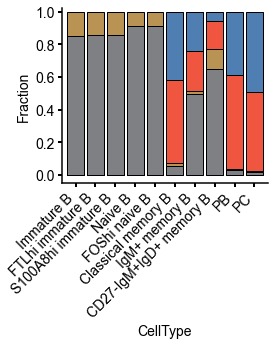

In [17]:
# Visualize the isotype composition across B cell subpopulations
plt.figure(facecolor='yellow')
ax = df_mat.T.plot(kind='bar', stacked=True, figsize=(4,5), 
                  color=colorlst, 
                  edgecolor='black', width=0.85)
ax.set_ylim(-0.05, 1.02)
ax.grid(False)
ax.get_legend().remove()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Fraction")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

In [18]:
############################################################
#    Gene usage comparison between cell subpopulations
#    and donors
############################################################

In [19]:
# Visualization of the gene usage pattern across immature B cell subpopulations

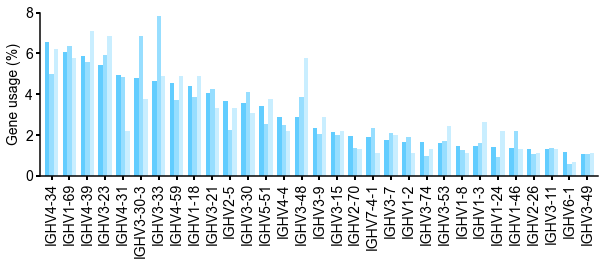

In [20]:
# Visualize heavy chain V gene usage

for i, subset in enumerate(["Immature B",  "FTLhi immature B", "S100A8hi immature B"]):
    df_temp = df_com[df_com.CellType_x==subset].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[0], axis=1).value_counts(normalize=True).rename(subset).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)
dF = dF.mul(100) # transform into percentage
dF = dF[dF["Immature B"]>=1]

fig, ax = plt.subplots(figsize=(10, 3))
ax = dF.plot(kind="bar", ax=ax, color=["#62cdff", "#97deff", "#c9eeff"], width=0.75)
ax.set_ylabel("Gene usage (%)")
ax.set_ylim(0,8)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

In [21]:
# Store the gene order information for consistency in the visualization
gene_order = dF.index.tolist()

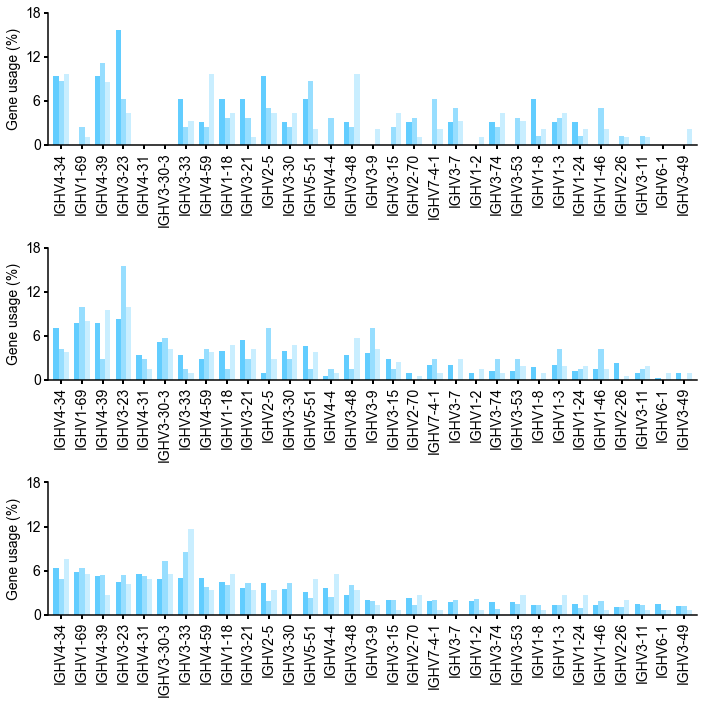

In [22]:
# Visualization of the gene usage pattern across immature B cell subpopulations in a donor-specific manner

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

for j, donor in enumerate(["CHEN", "DENG", "TAN"]):
    for i, subset in enumerate(["Immature B",  "FTLhi immature B", "S100A8hi immature B"]):
        df_temp = df_com[(df_com.CellType_x==subset) & df_com.index.str.contains(donor)].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[0], axis=1).value_counts(normalize=True).rename(subset).to_frame()
        if i == 0:
            dF = df_temp
        else:
            dF = pd.concat([dF, df_temp], axis=1)
    dF = dF.mul(100) # transform into percentage
    #dF = dF[dF["Immature B"]>=1]

    ax = axes[j]
    gene_order_filter = [x for x in gene_order if x not in dF.index]
    for gene in gene_order_filter:
        dF.loc[gene,:] = 0
    ax = dF.loc[gene_order,:].plot(kind="bar", ax=ax, color=["#62cdff", "#97deff", "#c9eeff"], width=0.75)
    ax.set_ylabel("Gene usage (%)")
    ax.set_ylim(0,18)
    ax.set_yticks([0, 6, 12, 18])

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=2, length=4)
    ax.yaxis.set_tick_params(width=2, length=4)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_legend().remove()
    
    dF_temp = dF.stack().reset_index().rename(columns={"level_0":"Gene", "level_1":"Subset", 0:"Usage"})
    dF_temp["Donor"] = donor
    if j == 0:
        dF_com = dF_temp
    else:
        dF_com = pd.concat([dF_com, dF_temp])
    
plt.tight_layout()

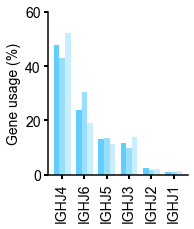

In [23]:
# Visualize heavy chain J gene usage

for i, subset in enumerate(["Immature B",  "FTLhi immature B", "S100A8hi immature B"]):
    df_temp = df_com[df_com.CellType_x==subset].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[1], axis=1).value_counts(normalize=True).rename(subset).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)
dF = dF.mul(100) # transform into percentage
dF = dF[dF["Immature B"]>=1]

fig, ax = plt.subplots(figsize=(2.5, 3))
ax = dF.plot(kind="bar", ax=ax, color=["#62cdff", "#97deff", "#c9eeff"], width=0.75)
ax.set_ylabel("Gene usage (%)")
ax.set_ylim(0, 60)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

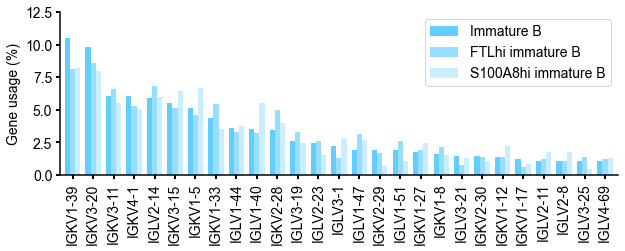

In [24]:
# Visualize light chain V gene usage

for i, subset in enumerate(["Immature B",  "FTLhi immature B", "S100A8hi immature B"]):
    df_temp = df_com[df_com.CellType_x==subset].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[3], axis=1).value_counts(normalize=True).rename(subset).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)
dF = dF.mul(100) # transform into percentage
dF = dF[dF["Immature B"]>=1]

fig, ax = plt.subplots(figsize=(10, 3))
ax = dF.plot(kind="bar", ax=ax, color=["#62cdff", "#97deff", "#c9eeff"], width=0.75)
ax.set_ylabel("Gene usage (%)")
ax.set_ylim(0,12.5)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

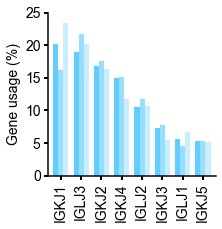

In [25]:
# Visualize light chain J gene usage

for i, subset in enumerate(["Immature B",  "FTLhi immature B", "S100A8hi immature B"]):
    df_temp = df_com[df_com.CellType_x==subset].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[4], axis=1).value_counts(normalize=True).rename(subset).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)
dF = dF.mul(100) # transform into percentage
dF = dF[dF["Immature B"]>=5]

fig, ax = plt.subplots(figsize=(3, 3))
ax = dF.plot(kind="bar", ax=ax, color=["#62cdff", "#97deff", "#c9eeff"], width=0.75)
ax.set_ylabel("Gene usage (%)")
ax.set_ylim(0,25)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

In [26]:
# Visualization of the gene usage pattern across naive B cell subpopulations

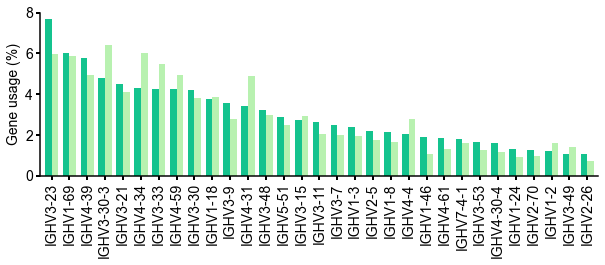

In [27]:
for i, subset in enumerate(["Naive B",  "FOShi naive B"]):
    df_temp = df_com[df_com.CellType_x==subset].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[0], axis=1).value_counts(normalize=True).rename(subset).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)
dF = dF.mul(100) # transform into percentage
dF = dF[dF["Naive B"]>=1]

fig, ax = plt.subplots(figsize=(10, 3))
ax = dF.plot(kind="bar", ax=ax, color=["#14c38e", "#b8f1b0"], width=0.75)
ax.set_ylabel("Gene usage (%)")
ax.set_ylim(0,8)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

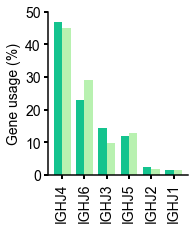

In [28]:
for i, subset in enumerate(["Naive B",  "FOShi naive B"]):
    df_temp = df_com[df_com.CellType_x==subset].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[1], axis=1).value_counts(normalize=True).rename(subset).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)
dF = dF.mul(100) # transform into percentage
dF = dF[dF["Naive B"]>=1]

fig, ax = plt.subplots(figsize=(2.5, 3))
ax = dF.plot(kind="bar", ax=ax, color=["#14c38e", "#b8f1b0"], width=0.75)
ax.set_ylabel("Gene usage (%)")
ax.set_ylim(0, 50)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

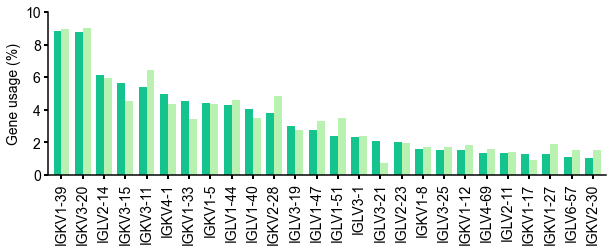

In [29]:
for i, subset in enumerate(["Naive B",  "FOShi naive B"]):
    df_temp = df_com[df_com.CellType_x==subset].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[3], axis=1).value_counts(normalize=True).rename(subset).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)
dF = dF.mul(100) # transform into percentage
dF = dF[dF["Naive B"]>=1]

fig, ax = plt.subplots(figsize=(10, 3))
ax = dF.plot(kind="bar", ax=ax, color=["#14c38e", "#b8f1b0"], width=0.75)
ax.set_ylabel("Gene usage (%)")
ax.set_ylim(0,10)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

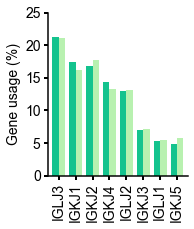

In [30]:
for i, subset in enumerate(["Naive B",  "FOShi naive B"]):
    df_temp = df_com[df_com.CellType_x==subset].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[4], axis=1).value_counts(normalize=True).rename(subset).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)
dF = dF.mul(100) # transform into percentage
dF = dF[dF["Naive B"]>=1]

fig, ax = plt.subplots(figsize=(2.5, 3))
ax = dF.plot(kind="bar", ax=ax, color=["#14c38e", "#b8f1b0"], width=0.75)
ax.set_ylabel("Gene usage (%)")
ax.set_ylim(0, 25)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

In [31]:
# Store the gene order information for consistency in the visualization
gene_order = ['IGHV3-23', 'IGHV1-69', 'IGHV4-39', 'IGHV3-30-3', 'IGHV3-21',
       'IGHV4-34', 'IGHV3-33', 'IGHV4-59', 'IGHV3-30', 'IGHV1-18', 'IGHV3-9',
       'IGHV4-31', 'IGHV3-48', 'IGHV5-51', 'IGHV3-15', 'IGHV3-11', 'IGHV3-7',
       'IGHV1-3', 'IGHV2-5', 'IGHV1-8', 'IGHV4-4', 'IGHV1-46', 'IGHV4-61',
       'IGHV7-4-1', 'IGHV3-53', 'IGHV4-30-4', 'IGHV1-24', 'IGHV2-70',
       'IGHV1-2', 'IGHV3-49', 'IGHV2-26']

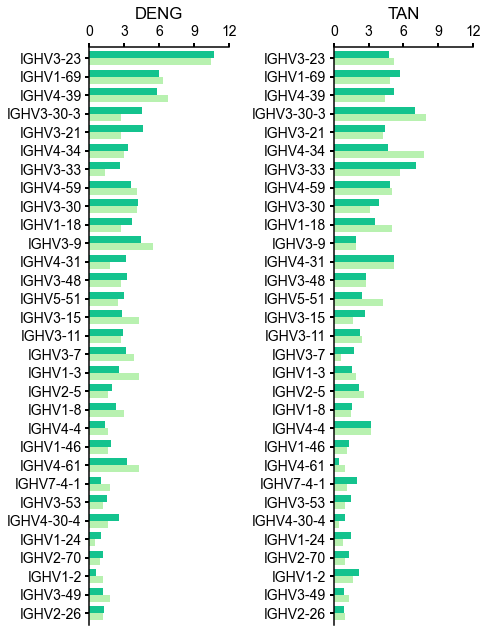

In [32]:
# Compare heavy chain V gene usage between naive B cell subpopulations in a donor-specific manner

fig, axes = plt.subplots(1, 2, figsize=(7,9))
for j, donor in enumerate(["DENG", "TAN"]):
    for i, subset in enumerate(["Naive B",  "FOShi naive B"]):
        df_temp = df_com[df_com.contig_id_x.str.startswith("B-%s-BB"%donor) & (df_com.CellType_x==subset)].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[0], axis=1).value_counts(normalize=True).rename(subset).to_frame()
        if i == 0:
            dF = df_temp
        else:
            dF = pd.concat([dF, df_temp], axis=1)
    dF = dF.mul(100) # transform into percentage

    ax = dF.loc[gene_order,].iloc[::-1,::-1].plot.barh(legend=False, color=["#b8f1b0", "#14c38e"], width=0.75,
                                                      ax=axes[j])

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=2, length=4)
    ax.yaxis.set_tick_params(width=2, length=4)

    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.xaxis.set_tick_params(labeltop=True)
    #ax.xaxis.set_tick_params(labelbottom=False)
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.set_xlim(0,12)
    ax.set_xticks(range(0,13,3))
    ax.set_title(donor)
plt.tight_layout()

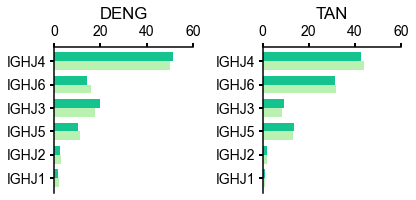

In [33]:
# Compare heavy chain J gene usage between naive B cell subpopulations in a donor-specific manner

gene_order = ["IGHJ4", "IGHJ6", "IGHJ3", "IGHJ5", "IGHJ2", "IGHJ1"]

fig, axes = plt.subplots(1, 2, figsize=(6,3))
for j, donor in enumerate(["DENG", "TAN"]):
    for i, subset in enumerate(["Naive B",  "FOShi naive B"]):
        df_temp = df_com[df_com.contig_id_x.str.startswith("B-%s"%donor) & (df_com.CellType_x==subset)].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[1], axis=1).value_counts(normalize=True).rename(subset).to_frame()
        if i == 0:
            dF = df_temp
        else:
            dF = pd.concat([dF, df_temp], axis=1)
    dF = dF.mul(100) # transform into percentage

    ax = dF.loc[gene_order,].iloc[::-1,::-1].plot.barh(legend=False, color=["#b8f1b0", "#14c38e"], width=0.75,
                                                      ax=axes[j])

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=2, length=4)
    ax.yaxis.set_tick_params(width=2, length=4)

    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.set_xlim(0,60)
    ax.set_title(donor)
plt.tight_layout()

In [34]:
# Store the gene order information for consistency in the visualization
gene_order = ['IGHV3-23', 'IGHV1-69', 'IGHV4-39', 'IGHV3-30-3', 'IGHV3-21',
       'IGHV4-34', 'IGHV3-33', 'IGHV4-59', 'IGHV3-30', 'IGHV1-18', 'IGHV3-9',
       'IGHV4-31', 'IGHV3-48', 'IGHV5-51', 'IGHV3-15', 'IGHV3-11', 'IGHV3-7',
       'IGHV1-3', 'IGHV2-5', 'IGHV1-8', 'IGHV4-4', 'IGHV1-46', 'IGHV4-61',
       'IGHV7-4-1', 'IGHV3-53', 'IGHV4-30-4', 'IGHV1-24', 'IGHV2-70',
       'IGHV1-2', 'IGHV3-49', 'IGHV2-26']

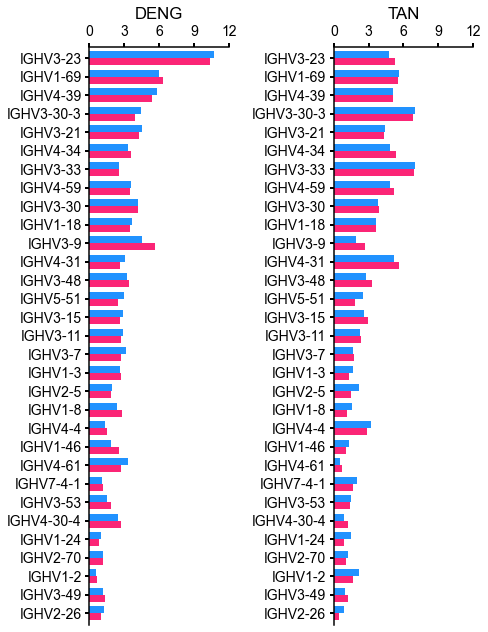

In [35]:
# Compare heavy chain V gene usage between tissues in a donor-specific manner

fig, axes = plt.subplots(1, 2, figsize=(7,9))
for j, donor in enumerate(["DENG", "TAN"]):

    for i, tissue in enumerate(["BB",  "PB"]):
        df_temp = df_com[df_com.index.str.contains(tissue) & df_com.contig_id_x.str.startswith("B-%s"%donor) & df_com.CellType_x.isin(["Naive B",  "FOShi naive B"])].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[0], axis=1).value_counts(normalize=True).rename(tissue).to_frame()
        if i == 0:
            dF = df_temp
        else:
            dF = pd.concat([dF, df_temp], axis=1)
    dF = dF.mul(100) # transform into percentage

    ax = dF.loc[gene_order,].iloc[::-1,::-1].plot.barh(legend=False, color=["#fb2576", "#2192ff"], width=0.75,
                                                      ax=axes[j])

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=2, length=4)
    ax.yaxis.set_tick_params(width=2, length=4)

    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.xaxis.set_tick_params(labeltop=True)
    #ax.xaxis.set_tick_params(labelbottom=False)
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.set_xlim(0,12)
    ax.set_xticks(range(0,13,3))
    ax.set_title(donor)
plt.tight_layout()

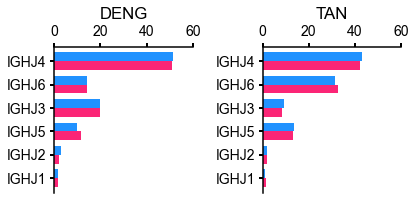

In [36]:
# Compare heavy chain J gene usage between tissues in a donor-specific manner

gene_order = ["IGHJ4", "IGHJ6", "IGHJ3", "IGHJ5", "IGHJ2", "IGHJ1"]

fig, axes = plt.subplots(1, 2, figsize=(6,3))
for j, donor in enumerate(["DENG", "TAN"]):

    for i, tissue in enumerate(["BB",  "PB"]):
        df_temp = df_com[df_com.index.str.contains(tissue) & df_com.contig_id_x.str.startswith("B-%s"%donor) & df_com.CellType_x.isin(["Naive B",  "FOShi naive B"])].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[1], axis=1).value_counts(normalize=True).rename(tissue).to_frame()
        if i == 0:
            dF = df_temp
        else:
            dF = pd.concat([dF, df_temp], axis=1)
    dF = dF.mul(100) # transform into percentage

    ax = dF.loc[gene_order,].iloc[::-1,::-1].plot.barh(legend=False, color=["#fb2576", "#2192ff"], width=0.75,
                                                      ax=axes[j])

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=2, length=4)
    ax.yaxis.set_tick_params(width=2, length=4)

    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.xaxis.set_tick_params(labeltop=True)
    #ax.xaxis.set_tick_params(labelbottom=False)
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.set_xlim(0,60)
    #ax.set_xticks(range(0,13,3))
    ax.set_title(donor)
plt.tight_layout()

In [37]:
# Visualization of the gene usage pattern across memory B cell subpopulations

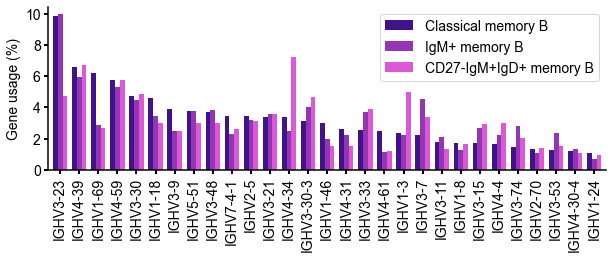

In [38]:
# Visualize heavy chain V gene usage

for i, subset in enumerate(["Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B"]):
    df_temp = df_com[df_com.CellType_x==subset].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[0], axis=1).value_counts(normalize=True).rename(subset).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)
dF = dF.mul(100) # transform into percentage
dF = dF[dF["Classical memory B"]>=1]

fig, ax = plt.subplots(figsize=(10, 3))
ax = dF.plot(kind="bar", ax=ax, color=["#40128b", "#9336b4", "#dd58d6"], width=0.75)
ax.set_ylabel("Gene usage (%)")
plt.yticks([0,2,4,6,8,10])

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


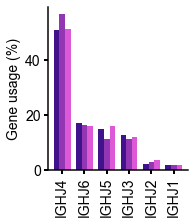

In [39]:
# Visualize heavy chain J gene usage

for i, subset in enumerate(["Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B"]):
    df_temp = df_com[df_com.CellType_x==subset].drop_duplicates("CloneTag").apply(lambda x:x.CloneTag.split("_")[1], axis=1).value_counts(normalize=True).rename(subset).to_frame()
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp], axis=1)
dF = dF.mul(100) # transform into percentage
dF = dF[dF["Classical memory B"]>=1]

fig, ax = plt.subplots(figsize=(2.5, 3))
ax = dF.plot(kind="bar", ax=ax, color=["#40128b", "#9336b4", "#dd58d6"], width=0.75)
ax.set_ylabel("Gene usage (%)")

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

In [40]:
############################################################
#    CDR3 length comparison between cell subpopulations
############################################################

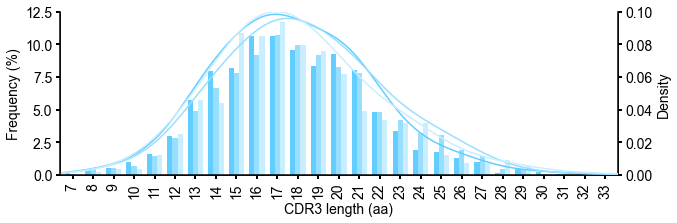

In [41]:
# Heavy chain CDR3 length distribution for immature B cell subpopulations 

fig, ax = plt.subplots(figsize=(10, 3))
colorlst = ["#62cdff", "#97deff", "#c9eeff"]

for i, celltype in enumerate(["Immature B",  "FTLhi immature B", "S100A8hi immature B"]):
    s_temp = pd.Series([len(x.split("_")[2]) for x in df_com[df_com.CellType_x==celltype].CloneTag.unique()]).value_counts(normalize=True).rename(celltype).mul(100)
    if i == 0:
        dF = s_temp.to_frame()
    else:
        dF = pd.concat([dF, s_temp], axis=1)
dF = dF.sort_index()
ax = dF.plot(kind="bar", ax=ax, color=["#62cdff", "#97deff", "#c9eeff"], width=0.75)
ax.set_ylabel("Frequency (%)")
ax.set_xlabel("CDR3 length (aa)")
ax.set_ylim(0, 12.5)

ax2 = ax.twinx()
for i, celltype in enumerate(["Immature B",  "FTLhi immature B", "S100A8hi immature B"]):
    sns.kdeplot(pd.Series([len(x.split("_")[2]) for x in df_com[df_com.CellType_x==celltype].CloneTag.unique()])-7, ax=ax2, legend=False, 
                   bw_adjust=1.5, color=colorlst[i])

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax2.yaxis.set_tick_params(width=2, length=4)
ax2.set_ylim(0, 0.1)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax2.spines['top'].set_visible(False)
#ax2.spines['right'].set_visible(False)
ax.get_legend().remove()

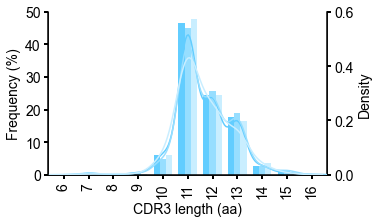

In [42]:
# Light chain CDR3 length distribution for immature B cell subpopulations 

for i, celltype in enumerate(["Immature B",  "FTLhi immature B", "S100A8hi immature B"]):
    s_temp = pd.Series([len(x.split("_")[5]) for x in df_com[df_com.CellType_x==celltype].CloneTag.unique()]).value_counts(normalize=True).rename(celltype).mul(100)
    if i == 0:
        dF = s_temp.to_frame()
    else:
        dF = pd.concat([dF, s_temp], axis=1)
dF = dF.sort_index()

fig, ax = plt.subplots(figsize=(5, 3))
colorlst = ["#62cdff", "#97deff", "#c9eeff"]

ax = dF.plot(kind="bar", ax=ax, color=["#62cdff", "#97deff", "#c9eeff"], width=0.75)
ax.set_ylabel("Frequency (%)")
ax.set_xlabel("CDR3 length (aa)")
ax.set_ylim(0, 50)

ax2 = ax.twinx()
for i, celltype in enumerate(["Immature B",  "FTLhi immature B", "S100A8hi immature B"]):
    sns.kdeplot(pd.Series([len(x.split("_")[5]) for x in df_com[df_com.CellType_x==celltype].CloneTag.unique()])-6, ax=ax2, legend=False, 
                   bw_adjust=1.5, color=colorlst[i])

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax2.yaxis.set_tick_params(width=2, length=4)
ax2.set_ylim(0, 0.6)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.get_legend().remove()


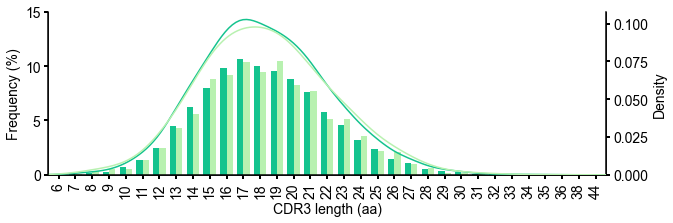

In [43]:
# Heavy chain CDR3 length distribution for naive B cell subpopulations 

for i, celltype in enumerate(["Naive B",  "FOShi naive B"]):
    s_temp = pd.Series([len(x.split("_")[2]) for x in df_com[df_com.CellType_x==celltype].CloneTag.unique()]).value_counts(normalize=True).rename(celltype).mul(100)
    if i == 0:
        dF = s_temp.to_frame()
    else:
        dF = pd.concat([dF, s_temp], axis=1)
dF = dF.sort_index()

fig, ax = plt.subplots(figsize=(10, 3))
colorlst = ["#14c38e", "#b8f1b0"]

ax = dF.plot(kind="bar", ax=ax, color=["#14c38e", "#b8f1b0"], width=0.75)
ax.set_ylabel("Frequency (%)")
ax.set_xlabel("CDR3 length (aa)")
ax.set_ylim(0, 15)

ax2 = ax.twinx()
for i, celltype in enumerate(["Naive B",  "FOShi naive B"]):
    sns.kdeplot(pd.Series([len(x.split("_")[2]) for x in df_com[df_com.CellType_x==celltype].CloneTag.unique()])-6, ax=ax2, legend=False, 
                   bw_adjust=1.5, color=colorlst[i])

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax2.yaxis.set_tick_params(width=2, length=4)
#ax2.set_ylim(0, 0.1)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax2.spines['top'].set_visible(False)
#ax2.spines['right'].set_visible(False)
ax.get_legend().remove()


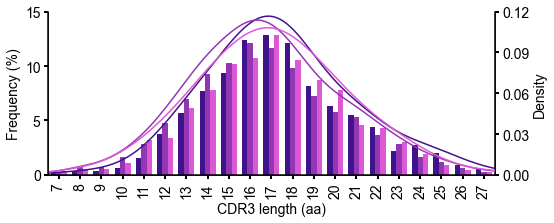

In [44]:
# Heavy chain CDR3 length distribution for memory B cell subpopulations 

for i, celltype in enumerate(["Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B"]):
    #s_temp = pd.Series([len(x[0].split("_")[2]) for x in clone_dict[celltype]]).value_counts(normalize=True).rename(celltype).mul(100)
    s_temp = pd.Series([len(x.split("_")[2]) for x in df_com[df_com.CellType_x==celltype].CloneTag.unique()]).value_counts(normalize=True).rename(celltype).mul(100)
    if i == 0:
        dF = s_temp.to_frame()
    else:
        dF = pd.concat([dF, s_temp], axis=1)
dF = dF.sort_index()


fig, ax = plt.subplots(figsize=(8, 3))
colorlst = ["#40128b", "#9336b4", "#dd58d6"]

ax = dF.plot(kind="bar", ax=ax, color=["#40128b", "#9336b4", "#dd58d6"], width=0.75)
ax.set_ylabel("Frequency (%)")
ax.set_xlabel("CDR3 length (aa)")
ax.set_ylim(0, 15)
#ax.set_xlim(1.5,28.5)
ax.set_xlim(1.5,22.5)

ax2 = ax.twinx()
for i, celltype in enumerate(["Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B"]):
    sns.kdeplot(pd.Series([len(x.split("_")[2]) for x in df_com[df_com.CellType_x==celltype].CloneTag.unique()])-5, ax=ax2, legend=False, 
                   bw_adjust=1.5, color=colorlst[i])

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)
ax2.yaxis.set_tick_params(width=2, length=4)
ax2.set_ylim(0, 0.12)
ax2.set_yticks([0, 0.03, 0.06, 0.09, 0.12])

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax2.spines['top'].set_visible(False)
#ax2.spines['right'].set_visible(False)
ax.get_legend().remove()

In [45]:
############################################################
#            Top 100 clone size distribution
############################################################

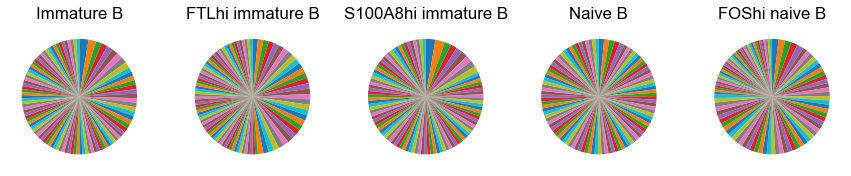

In [46]:
from math import floor
fig, axes = plt.subplots(1,5,figsize=(15,3))

for i, celltype in enumerate(bm_cell_types[:5]):
    ax = axes[i]
    ax = df_com[df_com.CellType_x==celltype].CloneTag.value_counts()[:100].plot(kind="pie", labels=[""]*100, ax=ax,
                                                                                   startangle=90, counterclock=False)
    ax.set_ylabel("")
    ax.set_title(celltype)


In [47]:
############################################################
#   Clonal relationship between B cell subpopulations 
############################################################

In [48]:
# Generate a dictionary storing cell types and their corresponding clonotype sets
celltypelst = ["Pre B", "Immature B", "FTLhi immature B", "S100A8hi immature B", 
                "Naive B", "FOShi naive B",
                 "Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B", "PB", "PC"]
clone_dict = {}
for celltype in celltypelst:
    clone_dict.update({celltype: df_com[df_com.CellType_x==celltype].CloneTag.unique().tolist()})

In [49]:
#  Clonal relationship between immature B cell subpopulations 

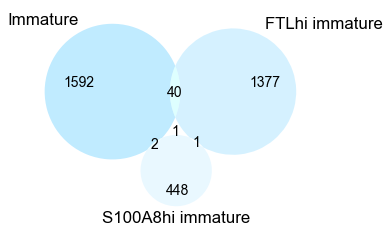

In [50]:
from matplotlib_venn import venn3

venn3([set(clone_dict["Immature B"]), set(clone_dict["FTLhi immature B"]), set(clone_dict["S100A8hi immature B"])],
     set_labels=["Immature", "FTLhi immature", "S100A8hi immature"], set_colors=["#62cdff", "#97deff", "#c9eeff"])

In [51]:
#  Clonal relationship between memory B cell subpopulations 

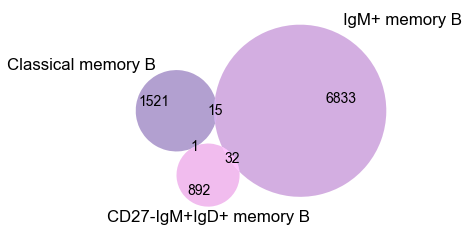

In [52]:
venn3([set(clone_dict["Classical memory B"]), set(clone_dict["IgM+ memory B"]), set(clone_dict["CD27-IgM+IgD+ memory B"])],
     set_labels=["Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B"], set_colors=["#40128b", "#9336b4", "#dd58d6"])

In [53]:
#  Clonal relationship between memory B cell subpopulations in a donor-specific manner

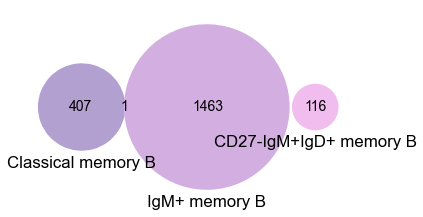

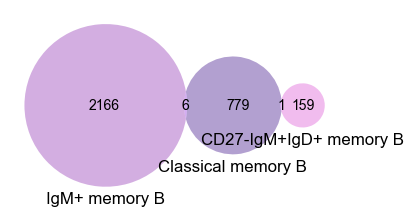

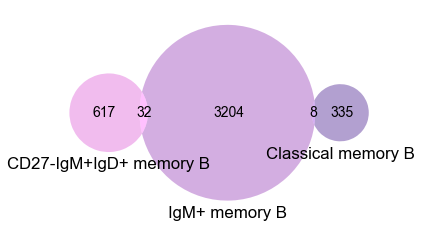

In [54]:
mem_subsets = ["Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B"]

for donor in ["CHEN", "DENG", "TAN"]:
    plt.figure()
    set1 = set(df_com[(df_com.CellType_x==mem_subsets[0]) & df_com.contig_id_x.str.contains(donor)].CloneTag.unique())
    set2 = set(df_com[(df_com.CellType_x==mem_subsets[1]) & df_com.contig_id_x.str.contains(donor)].CloneTag.unique())
    set3 = set(df_com[(df_com.CellType_x==mem_subsets[2]) & df_com.contig_id_x.str.contains(donor)].CloneTag.unique())

    venn3([set1, set2, set3], set_labels=mem_subsets, set_colors=["#40128b", "#9336b4", "#dd58d6"])

In [55]:
#  Investigate the properties of shared clonotypes

In [56]:
set1 = set(df_com[df_com.CellType_x==mem_subsets[0]].CloneTag.unique())
set2 = set(df_com[df_com.CellType_x==mem_subsets[1]].CloneTag.unique())
set3 = set(df_com[df_com.CellType_x==mem_subsets[2]].CloneTag.unique())

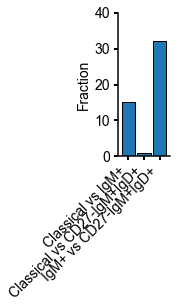

In [57]:
# Determine the if shared clonotypes comes from multiple donors

sharing_type_lst1 = []  # classical vs IgM+
sharing_type_lst2 = []  # classical vs CD27-IgM+IgD+
sharing_type_lst3 = []  # IgM+ vs CD27-IgM+IgD+

n1 = 0  # within donor
n2 = 0  # across donors

for clone in set1 & set2:
    n = len(set([x.split("-")[1] for x in df_com[df_com.CellType_x.isin(mem_subsets) & (df_com.CloneTag==clone)].index]))
    if n > 1:
        n2 += 1
    else:
        n1 += 1
sharing_type_lst1 = [n1, n2]

n1 = 0  # within donor
n2 = 0  # across donors
for clone in set1 & set3:
    n = len(set([x.split("-")[1] for x in df_com[df_com.CellType_x.isin(mem_subsets) & (df_com.CloneTag==clone)].index]))
    if n > 1:
        n2 += 1
    else:
        n1 += 1
sharing_type_lst2 = [n1, n2]

n1 = 0  # within donor
n2 = 0  # across donors
for clone in set2 & set3:
    n = len(set([x.split("-")[1] for x in df_com[df_com.CellType_x.isin(mem_subsets) & (df_com.CloneTag==clone)].index]))
    if n > 1:
        n2 += 1
    else:
        n1 += 1
sharing_type_lst3 = [n1, n2]
    

df_count = pd.DataFrame({"Classical vs IgM+": sharing_type_lst1, 
              "Classical vs CD27-IgM+IgD+": sharing_type_lst2, 
              "IgM+ vs CD27-IgM+IgD+": sharing_type_lst3})


ax = df_count.T.plot(kind='bar', stacked=True, figsize=(2.2,4.5), 
                  edgecolor='black', width=0.85)
ax.set_ylim(0,40)
ax.grid(False)
ax.get_legend().remove()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Fraction")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

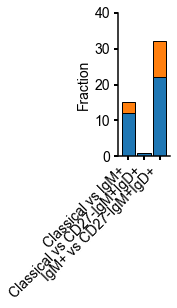

In [58]:
# Determine the if shared clonotypes comes from multiple tissues

sharing_type_lst1 = []  # classical vs IgM+
sharing_type_lst2 = []  # classical vs CD27-IgM+IgD+
sharing_type_lst3 = []  # IgM+ vs CD27-IgM+IgD+

n1 = 0  # within tissue
n2 = 0  # across tissues
for clone in set1 & set2:
    n = len(set([x.split("-")[2][:2] for x in df_com[df_com.CellType_x.isin(mem_subsets) & (df_com.CloneTag==clone)].index]))
    if n > 1:
        n2 += 1
    else:
        n1 += 1
sharing_type_lst1 = [n1, n2]

n1 = 0  # within tissue
n2 = 0  # across tissues
for clone in set1 & set3:
    n = len(set([x.split("-")[2][:2] for x in df_com[df_com.CellType_x.isin(mem_subsets) & (df_com.CloneTag==clone)].index]))
    if n > 1:
        n2 += 1
    else:
        n1 += 1
sharing_type_lst2 = [n1, n2]

n1 = 0  # within tissue
n2 = 0  # across tissues
for clone in set2 & set3:
    n = len(set([x.split("-")[2][:2] for x in df_com[df_com.CellType_x.isin(mem_subsets) & (df_com.CloneTag==clone)].index]))
    if n > 1:
        n2 += 1
    else:
        n1 += 1
sharing_type_lst3 = [n1, n2]
    

df_count = pd.DataFrame({"Classical vs IgM+": sharing_type_lst1, 
              "Classical vs CD27-IgM+IgD+": sharing_type_lst2, 
              "IgM+ vs CD27-IgM+IgD+": sharing_type_lst3})

ax = df_count.T.plot(kind='bar', stacked=True, figsize=(2.2,4.5), 
                  edgecolor='black', width=0.85)
ax.set_ylim(0,40)
ax.grid(False)
ax.get_legend().remove()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Fraction")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

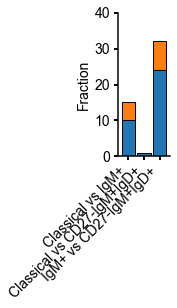

In [59]:
# Determine the if shared clonotypes comes from multiple isotypes

sharing_type_lst1 = []  # classical vs IgM+
sharing_type_lst2 = []  # classical vs CD27-IgM+IgD+
sharing_type_lst3 = []  # IgM+ vs CD27-IgM+IgD+

n1 = 0  # within isotype
n2 = 0  # across isotypes
for clone in set1 & set2:
    n = len(df_com[df_com.CellType_x.isin(mem_subsets) & (df_com.CloneTag==clone)].c_gene_x.unique())
    if n > 1:
        n2 += 1
    else:
        n1 += 1
sharing_type_lst1 = [n1, n2]

n1 = 0  # within isotype
n2 = 0  # across isotypes
for clone in set1 & set3:
    n = len(df_com[df_com.CellType_x.isin(mem_subsets) & (df_com.CloneTag==clone)].c_gene_x.unique())
    if n > 1:
        n2 += 1
    else:
        n1 += 1
sharing_type_lst2 = [n1, n2]

n1 = 0  # within isotype
n2 = 0  # across isotypes
for clone in set2 & set3:
    n = len(df_com[df_com.CellType_x.isin(mem_subsets) & (df_com.CloneTag==clone)].c_gene_x.unique())
    if n > 1:
        n2 += 1
    else:
        n1 += 1
sharing_type_lst3 = [n1, n2]
    

df_count = pd.DataFrame({"Classical vs IgM+": sharing_type_lst1, 
              "Classical vs CD27-IgM+IgD+": sharing_type_lst2, 
              "IgM+ vs CD27-IgM+IgD+": sharing_type_lst3})

ax = df_count.T.plot(kind='bar', stacked=True, figsize=(2.2,4.5), 
                  edgecolor='black', width=0.85)
ax.set_ylim(0,40)
ax.grid(False)
ax.get_legend().remove()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("Fraction")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

In [60]:
#  Clonal relationship between 2 naive B cell subpopulations in a donor-specific manner

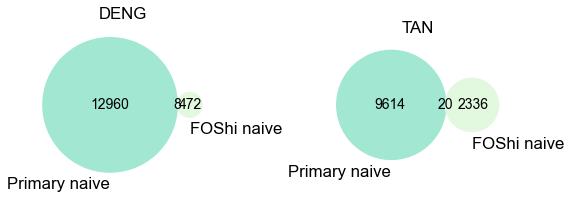

In [61]:
# Determine if naive B cells in different tissues (BM and PB) have the same clone tag
from math import floor
from matplotlib_venn import venn2
rcParams["font.size"] = 14

fig, axes = plt.subplots(1, 2, figsize=(8,5))

for i, donor in enumerate(["DENG", "TAN"]):
    set1 = set(df_com[df_com.contig_id_x.str.startswith("B-%s"%donor) &  df_com.CellType_x.isin(["Naive B"])].CloneTag.tolist())
    set2 = set(df_com[df_com.contig_id_x.str.startswith("B-%s"%donor) &  df_com.CellType_x.isin(["FOShi naive B"])].CloneTag.tolist())
    
    ax = axes[i]
    venn2([set1, set2], set_labels=["Primary naive", "FOShi naive"], set_colors=["#14c38e", "#b8f1b0"], ax=ax)
    ax.set_title(donor)

plt.tight_layout()

In [62]:
############################################################
#   SHM frequency comparison between 
#   memory B cell subpopulations
############################################################

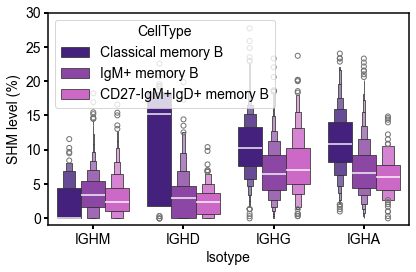

In [63]:
from scipy import stats
mem_subsets = ["Classical memory B", "IgM+ memory B", "CD27-IgM+IgD+ memory B"]
colors = ["#40128b", "#9336b4", "#dd58d6"]

for i, iso in enumerate(["IGHM", "IGHD", "IGHG", "IGHA"]):

    data = df_com[df_com.CellType_x.isin(mem_subsets) & df_com.v_shm_freq_x.notna() & (df_com.Isotype==iso)].drop_duplicates(["CloneTag", "CellType_x"])
    data["v_shm_freq"] = data["v_shm_freq_x"].mul(100)
    df_temp = data[["CellType_x", "v_shm_freq", "Isotype"]].reset_index().drop(columns=["barcode"]).rename(columns={"CellType_x": "CellType"})
    if i == 0:
        dF = df_temp
    else:
        dF = pd.concat([dF, df_temp])


fig, ax = plt.subplots(figsize=(6,4))
ax = sns.boxenplot(data=dF, x="Isotype", y="v_shm_freq", hue="CellType", hue_order=mem_subsets, #showfliers=False,
              order=["IGHM", "IGHD", "IGHG", "IGHA"], palette=["#40128b", "#9336b4", "#dd58d6"], 
                   line_kws=dict(color="white", alpha=0.7, linewidth=2))

#ax.legend_ = None

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=2, length=4)
ax.yaxis.set_tick_params(width=2, length=4)

ax.set_ylabel("SHM level (%)")
ax.set_ylim(-1, 30)

plt.tight_layout()